## This notebook is a demonstration for convolution on images.

In [1]:
import numpy as np
import scipy.signal
from skimage import io
import matplotlib.pyplot as plt

%matplotlib inline

Width (pixels):  400 
Height (pixels): 533 
color_channels:  3
Using the first color channel as a gray channel.


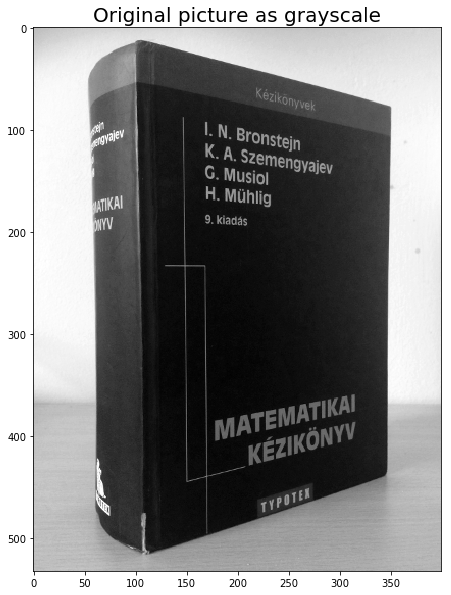

In [2]:
img = io.imread('bronstejn.PNG') # you can put your own image here


print('Width (pixels): ', img.shape[1], '\nHeight (pixels):', img.shape[0], '\ncolor_channels: ', img.shape[2])
plt.figure(figsize = (13,10))
img = img[:,:,0] # using only the first color channel as grayscale
plt.imshow(img, cmap='gray')
print('Using the first color channel as a gray channel.')
plt.title('Original picture as grayscale', fontsize=20)
#plt.savefig('original.png')
plt.show()

#### We will use cross-correlation instead of convolution.

In [3]:
print('Expected result:', 1*1+2*2+3*3)
tmp_mat = np.array([[1, 2, 3],
                    [0, 0, 0],
                    [0, 0, 0]])
scipy.signal.convolve2d(tmp_mat, np.flip(np.flip(tmp_mat, 0), 1), 'valid')

Expected result: 14


array([[14]])

In [4]:
scipy.signal.correlate2d(tmp_mat, tmp_mat, 'valid')

array([[14]])

In [5]:
np.flip(np.flip(tmp_mat, 0), 1)

array([[0, 0, 0],
       [0, 0, 0],
       [3, 2, 1]])

In [6]:
tmp_mat.T

array([[1, 0, 0],
       [2, 0, 0],
       [3, 0, 0]])

In [7]:
# a deep-learning-like convolution on the image with custom kernel
def conv_plot_wrapper(kernel, title, saveName=None):
    plt.figure(figsize = (18,6))

    plt.subplot(122)
    plt.title(title, fontsize=20)
    plt.imshow(scipy.signal.convolve2d(img, np.flip(np.flip(kernel,0),1)), cmap='gray')
    # flip-flip for deep-learning like conv
    plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
    plt.tick_params(axis='y', which='both', left='off', labelleft='off')
    
    plt.subplot(121)
    plt.title('Original picture as grayscale', fontsize=20)
    
    plt.imshow(img, cmap='gray')
    plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
    plt.tick_params(axis='y', which='both', left='off', labelleft='off')
    plt.tight_layout()
    
    if(saveName != None):
        plt.savefig(saveName)
    plt.show()

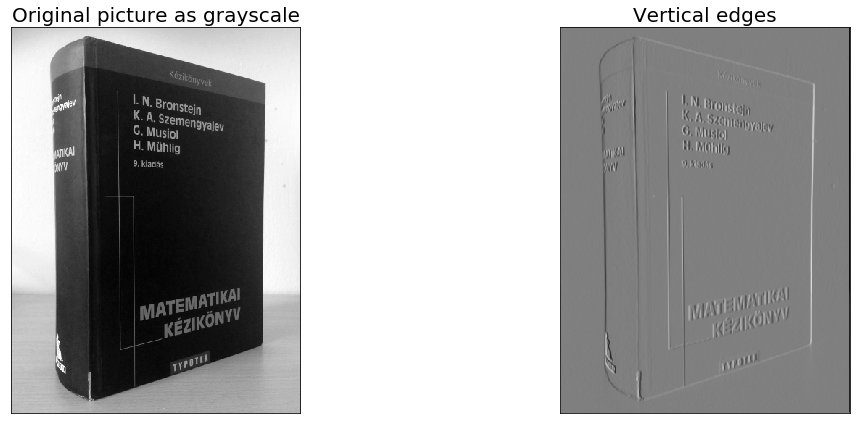

In [8]:
verticalEdges = np.array([[-1, 0, 1], 
                          [-1, 0, 1], 
                          [-1, 0, 1]])
conv_plot_wrapper(verticalEdges, 'Vertical edges')

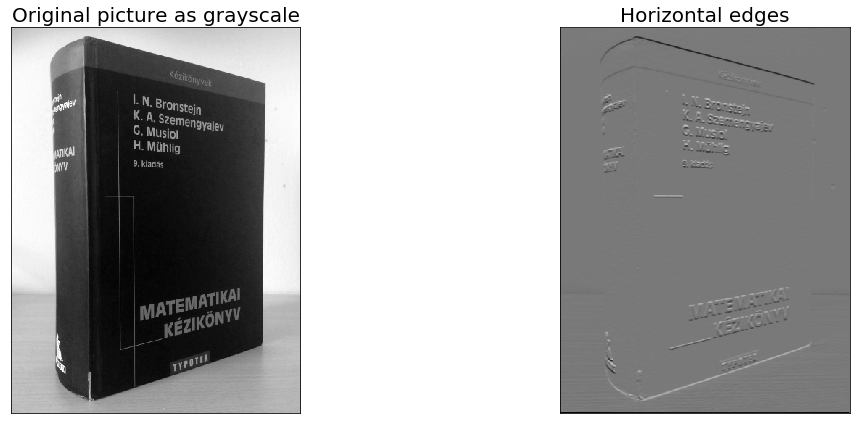

In [9]:
horizontalEdges = np.array([[-1, -1, -1], 
                            [ 0, 0, 0], 
                            [ 1, 1, 1]])
conv_plot_wrapper(horizontalEdges, 'Horizontal edges')

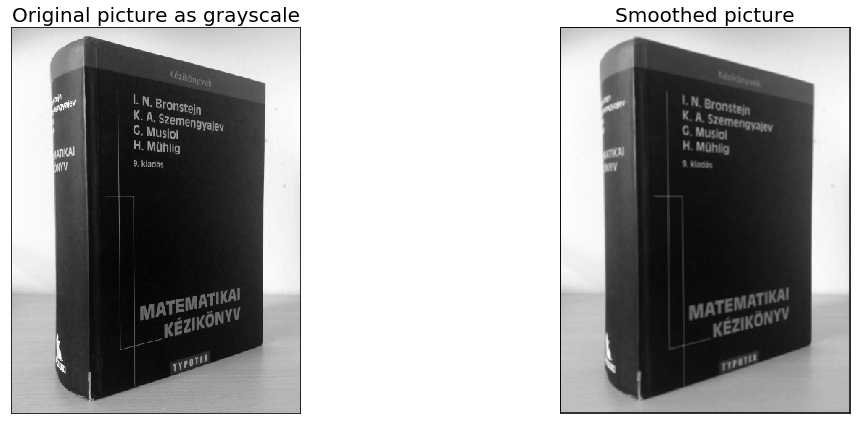

In [10]:
conv_plot_wrapper(np.ones((3,3))/(3*3), 'Smoothed picture')

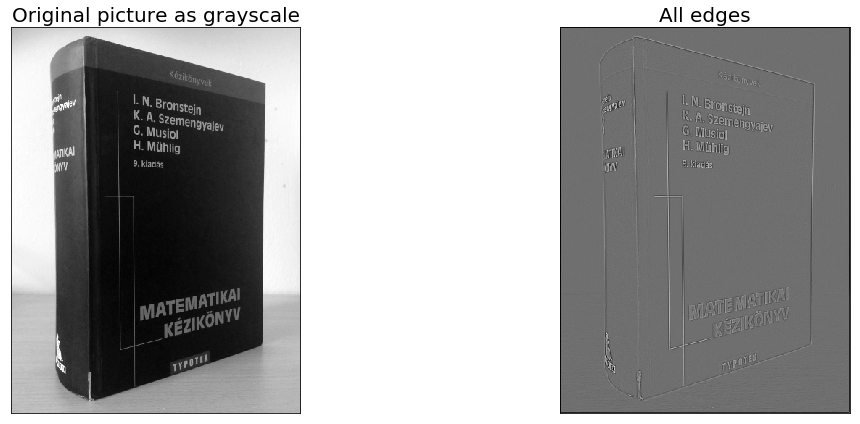

In [11]:
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])
conv_plot_wrapper(kernel, 'All edges')